In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport
from pycaret.classification import *
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [3]:
# Null values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [4]:
df.shape

(341, 16)

In [5]:
# Drop all null values
df.dropna(inplace=True)

In [6]:
df.shape

(317, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [8]:
df.Gender.value_counts() # Highly imbalanced column

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [9]:
print('Patient status in 100%')
round(df.Patient_Status.value_counts() * 100 / len(df), 1) # Imbalanced column

Patient status in 100%


Patient_Status
Alive    80.4
Dead     19.6
Name: count, dtype: float64

## Visualization

In [10]:
Patient_Status = df['Patient_Status'].value_counts()
transaction = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
                values=quantity,
                names=transaction, hole=.60,
                title="Patient Status")

figure.show()

In [11]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [12]:
Tumour_Stage = df['Tumour_Stage'].value_counts()
Tumour_Stage
transactions = Tumour_Stage.index
quantity = Tumour_Stage.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole=0.5,
                title="Tumour State of Patients")
figure.show()

In [13]:
histology = df['Histology'].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole=0.5,
                title="Histology of Patients")
figure.show()

In [14]:
histology = df['ER status'].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole=0.5,
                title="ER Status")
figure.show()

In [15]:
histology = df['PR status'].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole=0.5,
                title="PR Status")
figure.show()

In [16]:
histology = df['HER2 status'].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df,
                values=quantity,
                names=transactions, hole=0.5,
                title="HER2 Status")
figure.show()

In [17]:
df.drop(['Patient_ID', 'ER status', 'PR status', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis=1, inplace=True)

In [18]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [19]:
df.Gender.value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

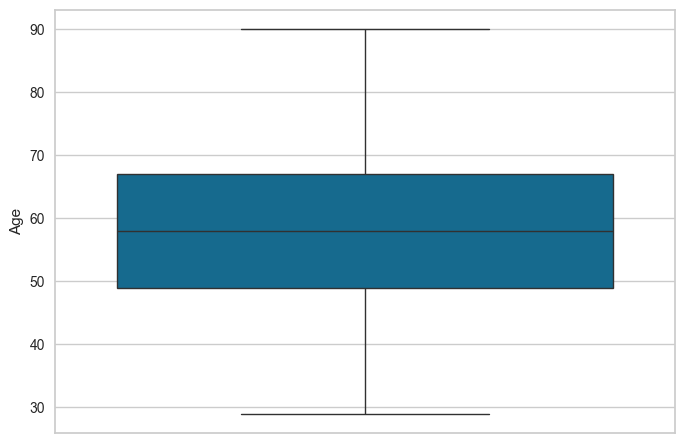

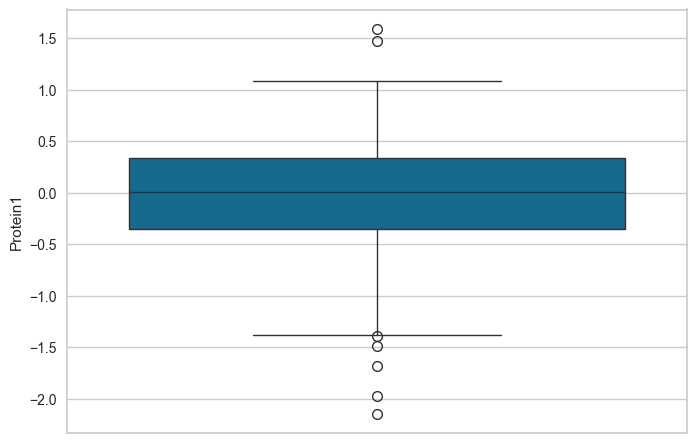

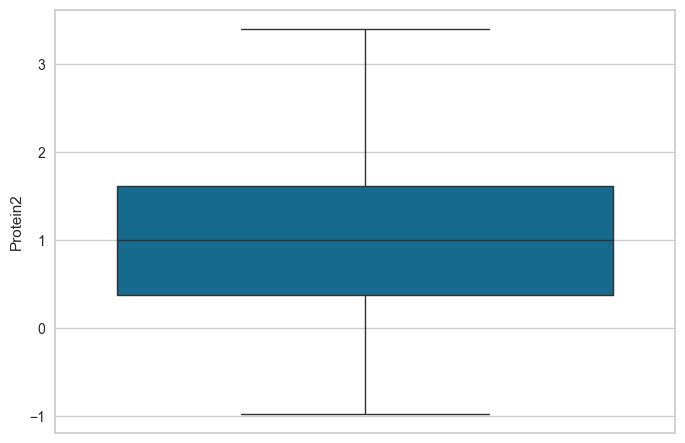

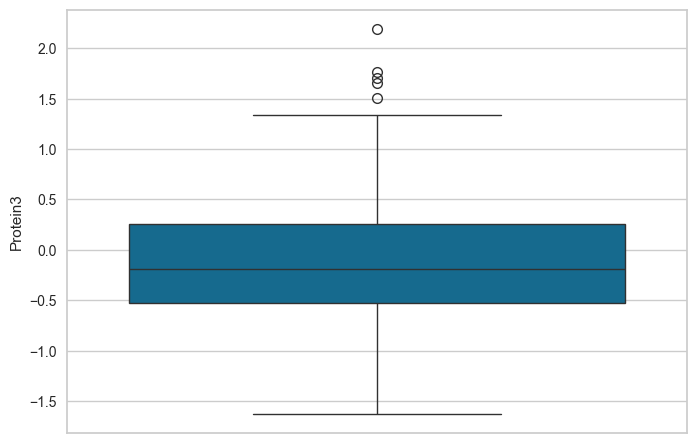

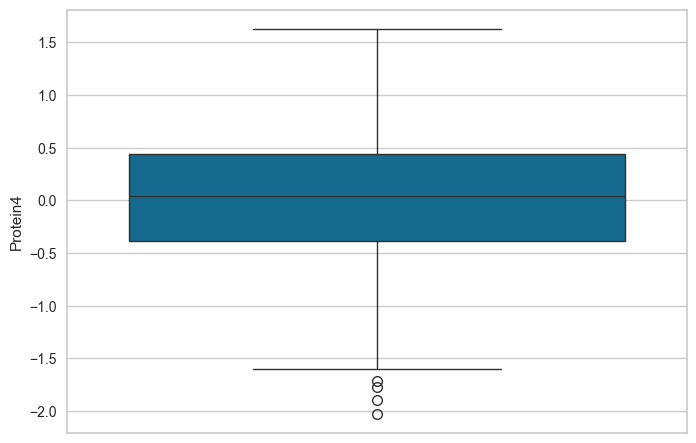

In [20]:
# Detect outliar using boxplot
for i in ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

In [21]:
# import pandas_profiling
# from ydata_profiling import ProfileReport
# ProfileReport(df, title="EDA Report of Breast Cancer Dataset")

profile = ProfileReport(df, title="EDA Report of Breast Cancer Dataset")
# profile.to_file("breast_cancer_report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
cancer = setup(data=df, target='Patient_Status',
               normalize=True,
               transformation=True,
               log_experiment=True,
               remove_multicollinearity=True, # Drop one of the two features that are highly correlated with each other
               numeric_imputation='median',
               fold=5,
               train_size=0.70)

,Description,Value
0,Session id,8709
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5


## Building ML Models

'lr' - Logistic Regression
'knn' - K Neighbors Classifier
'nb' - Naive Bayes
'dt' - Decision Tree Classifier
'svm' - SVM - Linear Kernel
'rbfsvm' - SVM - Radial Kernel
'gpc' - Gaussian Process Classifier
'mlp' - MLP Classifier
'ridge' - Ridge Classifier
'rf' - Random Forest Classifier
'qda' - Quadratic Discriminant Analysis
'ada' - Ada Boost Classifier
'gbc' - Gradient Boosting Classifier
'lda' - Linear Discriminant Analysis
'et' - Extra Trees Classifier
'xgboost' - Extreme Gradient Boosting
'lightgbm' - Light Gradient Boosting Machine
'catboost' - CatBoost Classifier

In [23]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.4213,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.7396,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.3837,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.5413,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.8182,0.6460,0.8182,0.8520,0.7548,0.1659,0.3007
Mean,0.8100,0.5464,0.8100,0.6927,0.7287,0.0332,0.0601
Std,0.0101,0.1337,0.0101,0.0810,0.0183,0.0664,0.1203


2024/11/05 11:37:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [24]:
# Check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [25]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
326,46.0,FEMALE,-0.74014,-0.73755,0.720320,0.721820,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
130,32.0,FEMALE,0.12545,1.45650,-0.680300,-0.010378,I,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
134,70.0,FEMALE,1.06740,0.99713,-0.586220,0.486220,I,Infiltrating Ductal Carcinoma,Negative,Lumpectomy
239,48.0,FEMALE,-0.34001,0.16257,-0.177200,0.412550,II,Mucinous Carcinoma,Negative,Simple Mastectomy
92,59.0,FEMALE,0.48045,0.63135,-0.701000,-0.162030,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
...,...,...,...,...,...,...,...,...,...,...
87,85.0,FEMALE,0.53809,0.28109,-0.106420,0.239630,I,Mucinous Carcinoma,Negative,Lumpectomy
209,54.0,FEMALE,0.51432,1.69360,-0.144010,1.024900,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
199,51.0,FEMALE,-0.47620,1.79460,-0.147730,-0.307780,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
246,56.0,FEMALE,0.45517,1.17740,-0.574560,0.366350,I,Mucinous Carcinoma,Negative,Modified Radical Mastectomy


In [26]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_I,Tumour_Stage_III,Tumour_Stage_II,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Other,Surgery_type_Simple Mastectomy,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy
326,-1.016115,-0.117309,-1.217615,-1.821734,1.393350,1.200614,-0.477261,-0.568642,0.868313,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,1.924091,-0.470100,-0.624449
130,-2.370288,-0.117309,0.259715,0.570399,-1.073409,-0.107886,2.095291,-0.568642,-1.151658,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,-0.519726,-0.470100,1.601411
134,0.880729,-0.117309,2.388804,0.023974,-0.848510,0.750860,2.095291,-0.568642,-1.151658,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,-0.519726,2.127205,-0.624449
239,-0.840985,-0.117309,-0.583658,-0.914194,0.028086,0.615465,-0.477261,-0.568642,0.868313,-1.601411,-0.561673,4.853407,-0.349038,-0.695141,1.924091,-0.470100,-0.624449
92,0.061448,-0.117309,1.001480,-0.397036,-1.124014,-0.342950,-0.477261,1.758577,-1.151658,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,-0.519726,-0.470100,1.601411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.897189,-0.117309,1.129317,-0.786152,0.162246,0.308162,2.095291,-0.568642,-1.151658,-1.601411,-0.561673,4.853407,-0.349038,-0.695141,-0.519726,2.127205,-0.624449
209,-0.336961,-0.117309,1.076362,0.859150,0.091667,1.813957,-0.477261,1.758577,-1.151658,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,-0.519726,-0.470100,1.601411
199,-0.585165,-0.117309,-0.807014,0.983421,0.084600,-0.558191,-0.477261,-0.568642,0.868313,0.624449,-0.561673,-0.206041,-0.349038,-0.695141,-0.519726,-0.470100,1.601411
246,-0.175410,-0.117309,0.946034,0.236230,-0.821224,0.531894,2.095291,-0.568642,-1.151658,-1.601411,-0.561673,4.853407,-0.349038,-0.695141,-0.519726,-0.470100,1.601411


In [27]:
get_config('target_param')

'Patient_Status'

In [28]:
# Compare all model from pycaret
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8102,0.5848,0.8102,0.7749,0.7751,0.2117,0.2434,0.1700
rf,Random Forest Classifier,0.8100,0.5464,0.8100,0.6927,0.7287,0.0332,0.0601,0.3760
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.1320
ridge,Ridge Classifier,0.8009,0.4995,0.8009,0.6482,0.7164,-0.0084,-0.0144,0.1520
et,Extra Trees Classifier,0.7966,0.5918,0.7966,0.7284,0.7424,0.1012,0.1260,0.4700
lr,Logistic Regression,0.7964,0.4953,0.7964,0.6475,0.7141,-0.0157,-0.0206,0.1340
lda,Linear Discriminant Analysis,0.7919,0.4988,0.7919,0.6467,0.7119,-0.0240,-0.0356,0.3680
gbc,Gradient Boosting Classifier,0.7786,0.5113,0.7786,0.7142,0.7380,0.0899,0.0991,0.2100
lightgbm,Light Gradient Boosting Machine,0.7737,0.4371,0.7737,0.6968,0.7202,0.0209,0.0257,0.1960
ada,Ada Boost Classifier,0.7468,0.5642,0.7468,0.7032,0.7180,0.0353,0.0424,0.2820


2024/11/05 11:37:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 11:37:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 11:37:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 11:37:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 11:37:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 11:37:25 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
dc = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5000,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.5000,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.5000,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7955,0.5000,0.7955,0.6327,0.7048,0.0000,0.0000
4,0.7955,0.5000,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000
Std,0.0105,0.0000,0.0105,0.0170,0.0146,0.0000,0.0000


2024/11/05 11:37:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [30]:
evaluate_model(dc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.4583,0.6667,0.6520,0.6591,-0.0870,-0.0872
1,0.7045,0.5278,0.7045,0.7183,0.7112,0.0530,0.0531
2,0.6818,0.4167,0.6818,0.6459,0.6634,-0.1846,-0.1873
3,0.6818,0.4698,0.6818,0.6527,0.6664,-0.0657,-0.0665
4,0.7045,0.5667,0.7045,0.7164,0.7102,0.1280,0.1283
Mean,0.6879,0.4879,0.6879,0.6771,0.6820,-0.0313,-0.0319
Std,0.0147,0.0530,0.0147,0.0330,0.0235,0.1098,0.1107


2024/11/05 11:37:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [32]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
unseen_predictions = predict_model(rf, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9317,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.91
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.66
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.92
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.99
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,0.81


## Save RF(Random Forest) as Pickle

In [34]:
save_model(rf, 'model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [35]:
from pycaret.classification import load_model
loaded_model = load_model('model_rf')

Transformation Pipeline and Model Successfully Loaded


## Prediction

In [36]:
unseen_predictions2 = predict_model(loaded_model, data=df)
unseen_predictions2.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9317,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.91
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.66
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.92
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.99
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,0.81


## Random Over Sampler

In [37]:
Patient_Status = df['Patient_Status'].value_counts()
transaction = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
                values=quantity,
                names=transaction, hole=.60,
                title="Patient Status")

figure.show()

In [39]:
ros = RandomOverSampler(random_state=1)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1), df[['Patient_Status']])

In [40]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [41]:
x_resampled.shape

(510, 10)

In [42]:
y_resampled.head()

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Dead


In [44]:
y_resampled.shape

(510, 1)

In [46]:
df2 = pd.concat([x_resampled, y_resampled], axis=1)
df.shape

(317, 11)

In [47]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [48]:
cancer2 = setup(data=df2, target='Patient_Status',
                normalize=True,
                transformation=True,
                log_experiment=True,
                remove_multicollinearity=True, # Drop one of the two features that are highly correlated with each other
                numeric_imputation='median',
                fold=5,
                train_size=0.70)

,Description,Value
0,Session id,8034
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Numeric features,5
9,Categorical features,5


In [49]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7917,0.8981,0.7917,0.7974,0.7907,0.5833,0.5890
1,0.9028,0.9850,0.9028,0.9107,0.9023,0.8056,0.8134
2,0.9014,0.9266,0.9014,0.9044,0.9013,0.8030,0.8059
3,0.9296,0.9619,0.9296,0.9299,0.9296,0.8592,0.8595
4,0.8451,0.9115,0.8451,0.8453,0.8450,0.6900,0.6902
Mean,0.8741,0.9366,0.8741,0.8775,0.8738,0.7482,0.7516
Std,0.0496,0.0322,0.0496,0.0491,0.0498,0.0992,0.0986


2024/11/05 12:40:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [50]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8853,0.9312,0.8853,0.8882,0.8850,0.7705,0.7734,0.3580
rf,Random Forest Classifier,0.8741,0.9366,0.8741,0.8775,0.8738,0.7482,0.7516,0.4500
lightgbm,Light Gradient Boosting Machine,0.8402,0.9314,0.8402,0.8482,0.8394,0.6806,0.6884,0.3800
gbc,Gradient Boosting Classifier,0.8349,0.9066,0.8349,0.8427,0.8340,0.6700,0.6776,0.2820
dt,Decision Tree Classifier,0.8152,0.8156,0.8152,0.8319,0.8131,0.6307,0.6469,0.1380
ada,Ada Boost Classifier,0.7788,0.8459,0.7788,0.7849,0.7776,0.5579,0.5638,0.2540
knn,K Neighbors Classifier,0.6585,0.7270,0.6585,0.6651,0.6547,0.3169,0.3234,0.3980
qda,Quadratic Discriminant Analysis,0.6445,0.6904,0.6445,0.6638,0.6218,0.2874,0.3059,0.1940
lr,Logistic Regression,0.6302,0.6461,0.6302,0.6329,0.6287,0.2606,0.2632,0.1400
ridge,Ridge Classifier,0.6302,0.6450,0.6302,0.6336,0.6283,0.2606,0.2638,0.1680


2024/11/05 12:42:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 12:42:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 12:42:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 12:42:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 12:42:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 12:42:09 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=8034, verbose=0,
                     warm_start=False)

In [51]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9035,0.8333,0.8344,0.8332,0.6667,0.6677
1,0.8889,0.9834,0.8889,0.9000,0.8881,0.7778,0.7888
2,0.8873,0.9341,0.8873,0.8873,0.8873,0.7746,0.7746
3,0.9437,0.9627,0.9437,0.9437,0.9437,0.8873,0.8873
4,0.8732,0.8722,0.8732,0.8758,0.8729,0.7461,0.7488
Mean,0.8853,0.9312,0.8853,0.8882,0.8850,0.7705,0.7734
Std,0.0354,0.0399,0.0354,0.0354,0.0355,0.0708,0.0707


2024/11/05 12:42:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

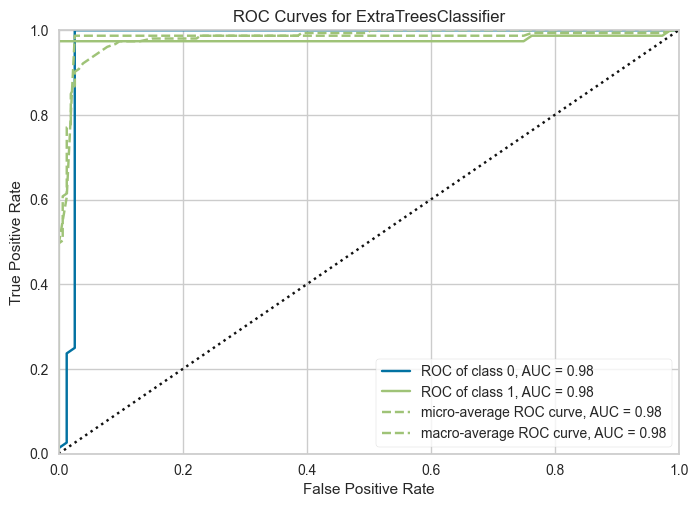

In [53]:
plot_model(et, plot='auc')

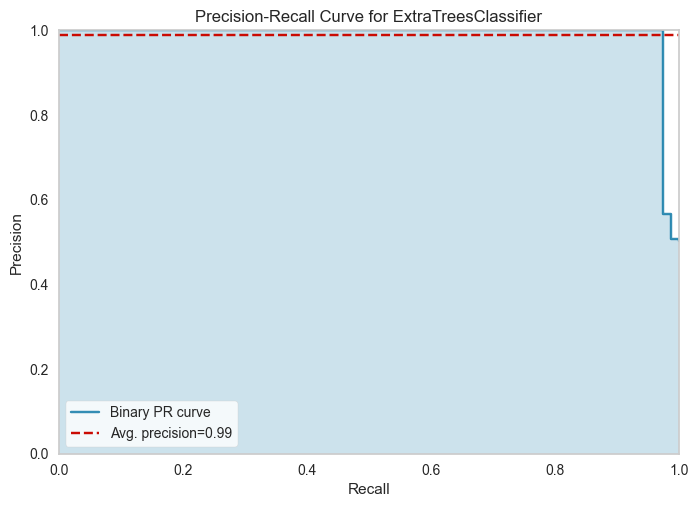

In [54]:
plot_model(et, plot='pr')

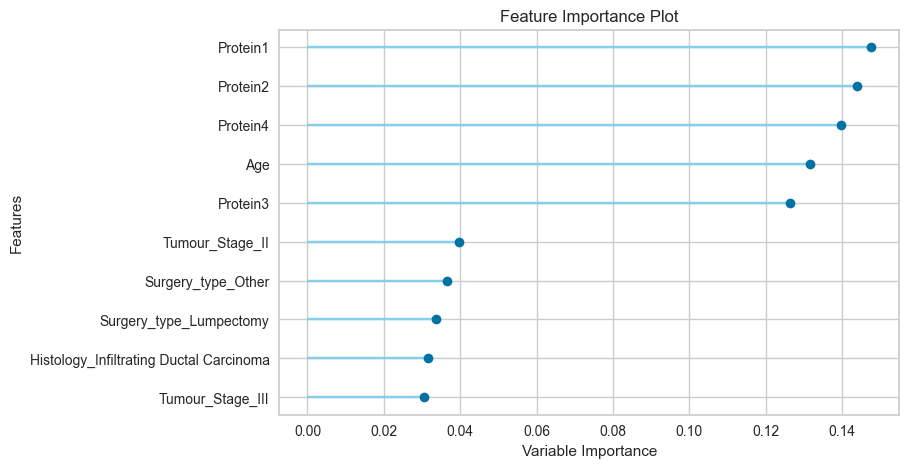

In [56]:
plot_model(et, plot='feature')

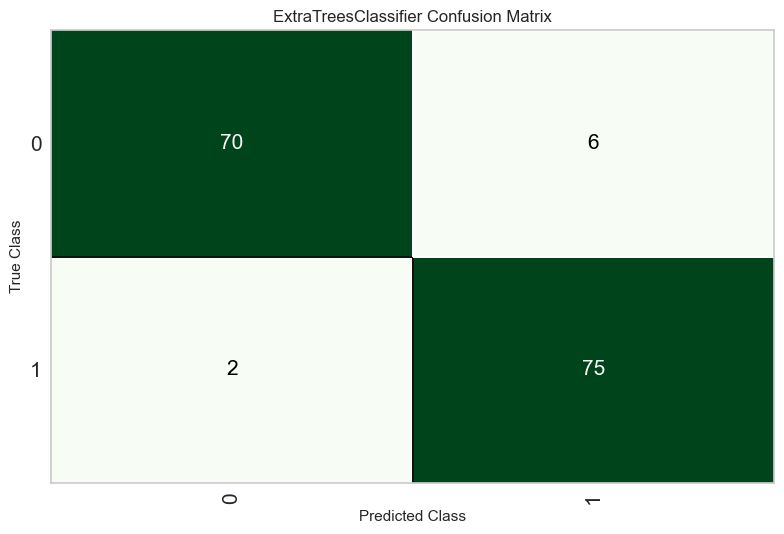

In [55]:
plot_model(et, plot='confusion_matrix')

In [57]:
unseen_predictions = predict_model(et, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9748,0.9917,0.9748,0.9758,0.9751,0.9217,0.9224


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.0


In [58]:
unseen_predictions.tail()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
329,36.0,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy,Dead,Dead,1.00
330,44.0,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Other,Dead,Dead,1.00
331,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Dead,Alive,0.97
332,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Dead,Dead,1.00
333,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Dead,Dead,1.00


## Save the Extra Trees Classifier Model

In [59]:
save_model(et, 'model_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [61]:
loaded_model = load_model('model_et')

Transformation Pipeline and Model Successfully Loaded


In [62]:
unseen_predictions = predict_model(loaded_model, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9748,0.9917,0.9748,0.9758,0.9751,0.9217,0.9224


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.0
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,1.0
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.0
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.0
